In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
dark_current = 0.15 #e/p/s
Read_noise = 9.3 #e

In [3]:
exposure_time = [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600] #s

In [4]:
n_pixel_1 = [96,95,97,95,96,90,96,97,96,95,94,96,96,95,97,95,93]
n_pixel_2 = [113,112,112,111,108,115,113,112,115,111,113,113,113,113,114,112,111]
n_pixel_3 = []

In [5]:
S_source_1 = [1133.91,1332.47,1560.87,1779.71,1964.09,2240.23,2424.95,2642.34,2838.33,2318.26,3221.69,3913.39,5445.92,6285.23,8717.63,11356.4,14140] #ADU
S_source_2 = [1188.51,1416.35,1671.07,1901.81,2133.46,2369.35,2624.88,2853.11,3061.83,2584.86,3577,4261.97,5579.79,6899.05,9664.76,12357.1,15577.5]
S_source_3 = []

In [6]:
n_pixel_Sky_1 = [483,480,471,479,481,474,476,480,472,479,475,471,468,474,473,477,472]
n_pixel_Sky_2 = [567,562,567,566,567,564,565,564,563,570,563,566,564,566,566,567,565]
n_pixel_Sky_3 = []

In [7]:
S_sky_1 = [1070.02,1205.02,1354.79,1506.83,1627.6,1808.76,1952.97,2088.57,2220.73,1581.09,2143.86,2720.42,4661.21,4668.74,6046.99,7909.27,10000.1] #ADU
S_sky_2 = [1088.62,1225.4,1369.73,1515.33,1637.41,1803.49,1935.25,2077.92,2201.68,1582.14,2110.09,2594.16,4372.15,4875.7,5935.36,7631.55,10049.8]
S_sky_3 = []

In [10]:
n_pixel_1 = np.array(n_pixel_1)
n_pixel_Sky_1 = np.array(n_pixel_Sky_1)
S_sky_1 = np.array(S_sky_1)
S_source_1 = np.array(S_source_1)

n_pixel_2 = np.array(n_pixel_2)
n_pixel_Sky_2 = np.array(n_pixel_Sky_2)
S_sky_2 = np.array(S_sky_2)
S_source_2 = np.array(S_source_2)

n_pixel_2 = np.array(n_pixel_3)
n_pixel_Sky_2 = np.array(n_pixel_Sky_3)
S_sky_2 = np.array(S_sky_3)
S_source_2 = np.array(S_source_3)

exposure_time = np.array(exposure_time)

In [16]:
# Without applying approximation
SNR_1 = S_source_1/np.sqrt(S_source_1 + n_pixel_1*(1+(n_pixel_1/n_pixel_Sky_1))*(S_sky_1 + exposure_time*dark_current + Read_noise**2))
SNR_2 = S_source_2/np.sqrt(S_source_2 + n_pixel_2*(1+(n_pixel_2/n_pixel_Sky_2))*(S_sky_2 + exposure_time*dark_current + Read_noise**2))
SNR_3 = S_source_3/np.sqrt(S_source_3 + n_pixel_3*(1+(n_pixel_3/n_pixel_Sky_3))*(S_sky_3 + exposure_time*dark_current + Read_noise**2))

In [17]:
SNR = np.mean((SNR_1,SNR_2,SNR_3), axis=0)

In [30]:
SNR, SNR_1, SNR_2

(array([ 3.02916594,  3.40638396,  3.7687224 ,  4.12435344,  4.44485331,
         4.76702759,  4.96889252,  5.2292017 ,  5.42507483,  5.3520671 ,
         6.41840416,  6.8959931 ,  7.20267567,  8.39293669, 10.3565311 ,
        11.89353295, 13.24671693]),
 array([ 3.09300962,  3.45600523,  3.77807988,  4.15068018,  4.38939742,
         4.93385631,  4.96117597,  5.2055522 ,  5.45287988,  5.26516483,
         6.35629351,  6.79773275,  7.28807944,  8.45052607, 10.18448778,
        11.77110245, 13.20261865]),
 array([ 2.96532226,  3.35676268,  3.75936493,  4.09802669,  4.5003092 ,
         4.60019887,  4.97660906,  5.25285121,  5.39726979,  5.43896936,
         6.4805148 ,  6.99425346,  7.11727189,  8.33534731, 10.52857442,
        12.01596346, 13.2908152 ]))

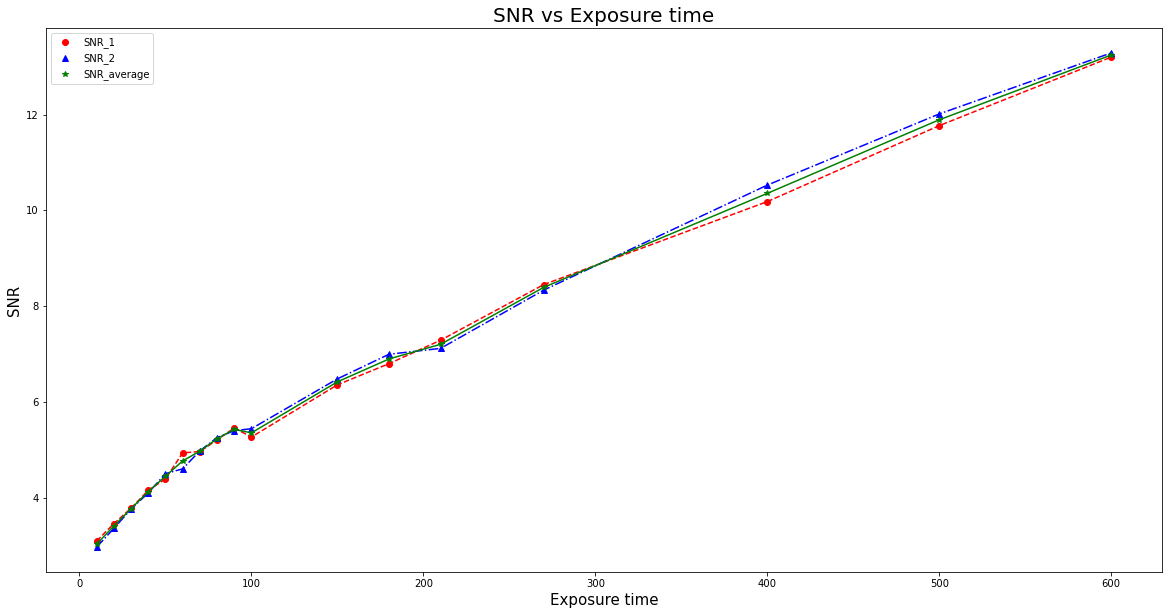

In [69]:
plt.figure(figsize = (20,10))
plt.plot(exposure_time, SNR_1, 'ro', label='SNR_1')
plt.plot(exposure_time, SNR_1, 'r--')
plt.plot(exposure_time, SNR_2, 'b^', label='SNR_2')
plt.plot(exposure_time, SNR_2, 'b-.')
plt.plot(exposure_time, SNR, 'g*', label='SNR_average')
plt.plot(exposure_time, SNR, 'g-')
plt.title('SNR vs Exposure time', fontsize=20)
plt.xlabel('Exposure time', fontsize=15)
plt.ylabel('SNR', fontsize=15)
plt.legend()

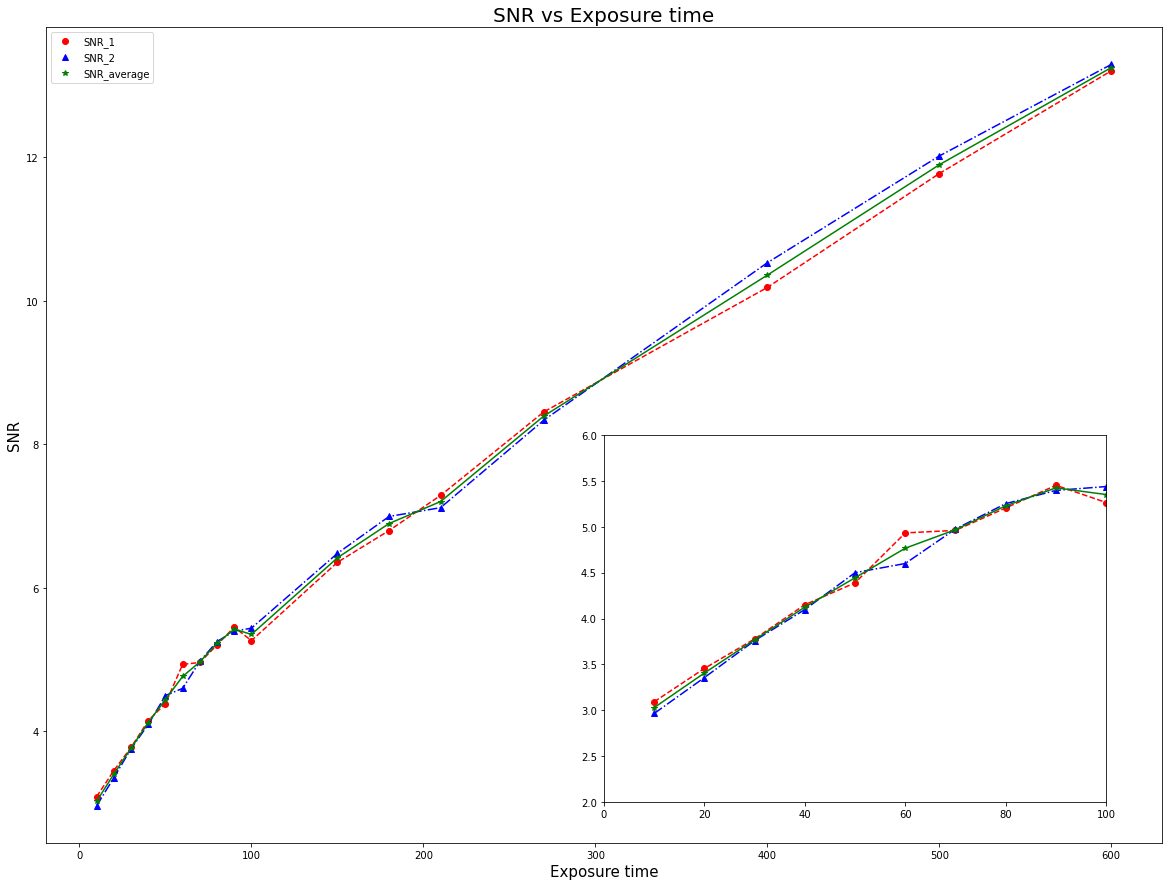

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

fig, ax1 = plt.subplots(figsize=(20,15))
ax1.plot(exposure_time, SNR_1, 'ro', label='SNR_1')
ax1.plot(exposure_time, SNR_1, 'r--')
ax1.plot(exposure_time, SNR_2, 'b^', label='SNR_2')
ax1.plot(exposure_time, SNR_2, 'b-.')
ax1.plot(exposure_time, SNR, 'g*', label='SNR_average')
ax1.plot(exposure_time, SNR, 'g-')
ax1.set_title('SNR vs Exposure time', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR',fontsize=15)
ax1.legend(loc=2)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.5,0.05,0.45,0.45])
ax2.set_axes_locator(ip)


ax2.plot(exposure_time, SNR_1, 'ro', label='SNR_1')
ax2.plot(exposure_time, SNR_1, 'r--')
ax2.plot(exposure_time, SNR_2, 'b^', label='SNR_2')
ax2.plot(exposure_time, SNR_2, 'b-.')
ax2.plot(exposure_time, SNR, 'g*', label='SNR_average')
ax2.plot(exposure_time, SNR, 'g-')
ax2.set_xlim(0,100)
ax2.set_ylim(2,6)

plt.show()